In [3]:
import tensorflow

In [4]:
import keras

In [5]:
import keras_preprocessing

In [6]:
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt

In [5]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
# Load the data

(X_train, y_train), (X_test, y_test)=mnist.load_data()

In [9]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [10]:
X_train[5].shape

(28, 28)

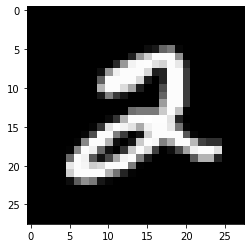

In [11]:
plt.imshow(X_train[5],cmap="gray")

In [12]:
y_train[5]

2

In [13]:
image_height, image_width= 28,28
#pre process img data

In [14]:
X_train= X_train.reshape(60000, image_height*image_width)
X_test= X_test.reshape(10000, image_height*image_width)

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [15]:
print(X_train[5])
X_train= X_train.astype('float32')
X_test= X_test.astype('float32')

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0  13  25 100 122   7   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  33 151 208 252 252 252 146   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  40 152 244 252 253 224 211 252 232
  40   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  15
 152 239 252 252 252 216  31  37 252 252  60   0   

In [16]:
X_train/=255.0
X_test/=255.0
print(X_train[5])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [17]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [18]:
# Converting the target value into 10 bins. So we will see that the output from a model will then go into one of these bins
y_train= to_categorical(y_train,10)
y_test=to_categorical(y_test,10)
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [19]:
# Building the model

model=Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [20]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Total no of nodes*total umber of weights + Total number of bias

784*512 +512

401920

In [22]:
512*512+512

262656

In [23]:
512*10+10

5130

In [24]:
# Model training
history= model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1827 - accuracy: 0.9448 - val_loss: 0.0906 - val_accuracy: 0.9714
Epoch 2/15
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0788 - accuracy: 0.9755 - val_loss: 0.0783 - val_accuracy: 0.9750
Epoch 3/15
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0542 - accuracy: 0.9826 - val_loss: 0.0713 - val_accuracy: 0.9783
Epoch 4/15
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0434 - accuracy: 0.9865 - val_loss: 0.1046 - val_accuracy: 0.9732
Epoch 5/15
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0349 - accuracy: 0.9889 - val_loss: 0.0710 - val_accuracy: 0.9807
Epoch 6/15
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0282 - accuracy: 0.9915 - val_loss: 0.0862 - val_accuracy: 0.9786
Epoch 7/15
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0250 - accuracy: 0.9919 - val_loss: 0.0909 - val

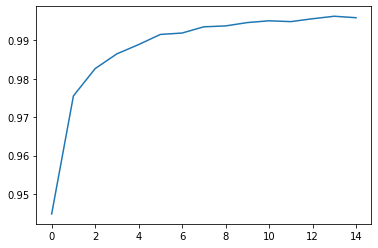

In [25]:
plt.plot(history.history['accuracy'])

In [26]:
score= model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1313 - accuracy: 0.9804


In [36]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical

In [37]:
(X_train, y_train),(X_test, y_test)= mnist.load_data()

In [38]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [39]:
X_train= X_train.reshape(60000,28,28,1)
X_test= X_test.reshape(10000,28,28,1)
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/=255.0
X_test/=255.0

y_train= to_categorical(y_train,10)
y_test= to_categorical(y_test,10)

In [40]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [41]:
# CNN model development

cnn=Sequential()
cnn.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Flatten())
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(10, activation='softmax'))
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(cnn.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1568)              0         
                                                                 
 dense_5 (Dense)             (None, 64)               

In [42]:
history_cnn= cnn.fit(X_train, y_train, epochs=12, verbose=1, validation_data=(X_train, y_train))

Epoch 1/12
1875/1875 [==============================] - 78s 41ms/step - loss: 0.1510 - accuracy: 0.9542 - val_loss: 0.0564 - val_accuracy: 0.9823
Epoch 2/12
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0488 - accuracy: 0.9847 - val_loss: 0.0281 - val_accuracy: 0.9911
Epoch 3/12
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0345 - accuracy: 0.9893 - val_loss: 0.0206 - val_accuracy: 0.9940
Epoch 4/12
1875/1875 [==============================] - 80s 42ms/step - loss: 0.0250 - accuracy: 0.9921 - val_loss: 0.0158 - val_accuracy: 0.9948
Epoch 5/12
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0195 - accuracy: 0.9939 - val_loss: 0.0170 - val_accuracy: 0.9947
Epoch 6/12
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0158 - accuracy: 0.9949 - val_loss: 0.0100 - val_accuracy: 0.9969
Epoch 7/12
1875/1875 [==============================] - 81s 43ms/step - loss: 0.0119 - accuracy: 0.9961 - val_loss: 0.0077 -

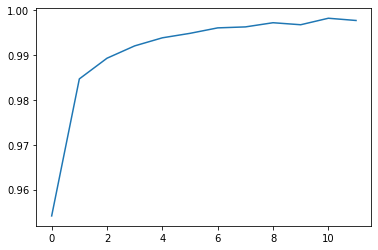

In [43]:
plt.plot(history_cnn.history['accuracy'])

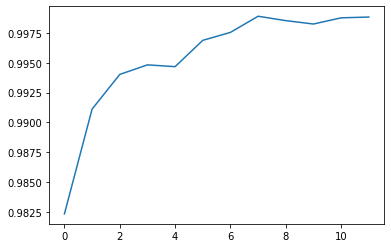

In [44]:
plt.plot(history_cnn.history['val_accuracy'])